# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

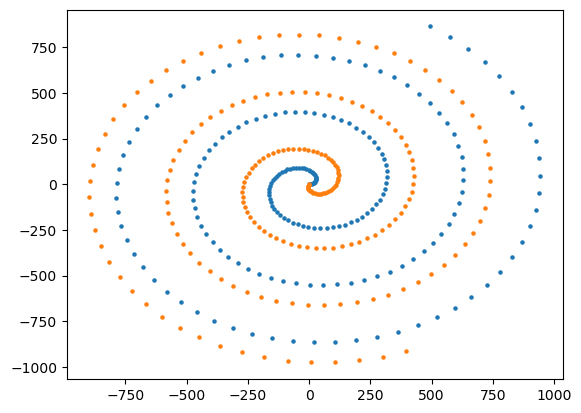

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7060\2939864048.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


0    200
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [5]:
!pip install tensorflow
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

!pip install --upgrade keras
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
!pip install --upgrade tensorflow
import tensorflow as tf
tf.compat.v1.get_default_graph()

  Using cached keras-3.0.2-py3-none-any.whl (1.0 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.2
    Uninstalling keras-3.0.2:
      Successfully uninstalled keras-3.0.2



In [6]:
# your code here
X = df.drop('CLASS', axis=1)
y = df['CLASS']

In [7]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [8]:
# Normalize the input data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_normalize = scaler.fit_transform(X_train)
X_test_normalize = scaler.transform(X_test) 

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [10]:
# Build the model.
from tensorflow.keras.optimizers import Adam

custom_optimizer = Adam(learning_rate=0.1) 

model = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [11]:
# Compile the model.
model.compile(
  optimizer='adam', 
  loss='binary_crossentropy', 
  metrics=['accuracy'],
)                 

In [14]:
# Train the model.
history = model.fit(
  X_train_normalize,
  y_train, 
  epochs=305,
  batch_size=10, 
  validation_split=0.2
)                   

Epoch 1/305
26/26 [==============================] - 1s 5ms/step - loss: 0.6510 - accuracy: 0.6289 - val_loss: 0.7894 - val_accuracy: 0.4844
Epoch 2/305
26/26 [==============================] - 0s 5ms/step - loss: 0.6378 - accuracy: 0.6289 - val_loss: 0.7751 - val_accuracy: 0.4219
Epoch 3/305
26/26 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.5859 - val_loss: 0.7857 - val_accuracy: 0.4531
Epoch 4/305
26/26 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.6406 - val_loss: 0.7539 - val_accuracy: 0.5312
Epoch 5/305
26/26 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.6211 - val_loss: 0.7583 - val_accuracy: 0.5000
Epoch 6/305
26/26 [==============================] - 0s 4ms/step - loss: 0.6113 - accuracy: 0.6602 - val_loss: 0.8072 - val_accuracy: 0.4688
Epoch 7/305
26/26 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.6250 - val_loss: 0.7474 - val_accuracy: 0.4219
Epoch 8/305
2

Epoch 59/305
26/26 [==============================] - 0s 4ms/step - loss: 0.3810 - accuracy: 0.7812 - val_loss: 0.5800 - val_accuracy: 0.6719
Epoch 60/305
26/26 [==============================] - 0s 4ms/step - loss: 0.4134 - accuracy: 0.7617 - val_loss: 0.7851 - val_accuracy: 0.6562
Epoch 61/305
26/26 [==============================] - 0s 3ms/step - loss: 0.3677 - accuracy: 0.7734 - val_loss: 0.6874 - val_accuracy: 0.6406
Epoch 62/305
26/26 [==============================] - 0s 4ms/step - loss: 0.3703 - accuracy: 0.8008 - val_loss: 0.6681 - val_accuracy: 0.6875
Epoch 63/305
26/26 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.7969 - val_loss: 0.9064 - val_accuracy: 0.6250
Epoch 64/305
26/26 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8008 - val_loss: 1.0308 - val_accuracy: 0.6250
Epoch 65/305
26/26 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.8203 - val_loss: 0.6341 - val_accuracy: 0.6406
Epoch 

26/26 [==============================] - 0s 4ms/step - loss: 0.2485 - accuracy: 0.8320 - val_loss: 0.7573 - val_accuracy: 0.7656
Epoch 117/305
26/26 [==============================] - 0s 4ms/step - loss: 0.3038 - accuracy: 0.8359 - val_loss: 1.0108 - val_accuracy: 0.6875
Epoch 118/305
26/26 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.8359 - val_loss: 0.8360 - val_accuracy: 0.7344
Epoch 119/305
26/26 [==============================] - 0s 3ms/step - loss: 0.2653 - accuracy: 0.8320 - val_loss: 0.6834 - val_accuracy: 0.7656
Epoch 120/305
26/26 [==============================] - 0s 4ms/step - loss: 0.2389 - accuracy: 0.8594 - val_loss: 0.7584 - val_accuracy: 0.7344
Epoch 121/305
26/26 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.8516 - val_loss: 0.8531 - val_accuracy: 0.7188
Epoch 122/305
26/26 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.8359 - val_loss: 0.8274 - val_accuracy: 0.7031
Epoch 123/305

26/26 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.8055 - val_accuracy: 0.8438
Epoch 174/305
26/26 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9961 - val_loss: 0.7411 - val_accuracy: 0.8906
Epoch 175/305
26/26 [==============================] - 0s 5ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.7056 - val_accuracy: 0.8906
Epoch 176/305
26/26 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.7228 - val_accuracy: 0.8906
Epoch 177/305
26/26 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.7173 - val_accuracy: 0.8906
Epoch 178/305
26/26 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.7134 - val_accuracy: 0.8906
Epoch 179/305
26/26 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.7433 - val_accuracy: 0.8906
Epoch 180/305

26/26 [==============================] - 0s 4ms/step - loss: 8.6746e-04 - accuracy: 1.0000 - val_loss: 0.8559 - val_accuracy: 0.8906
Epoch 231/305
26/26 [==============================] - 0s 3ms/step - loss: 8.5104e-04 - accuracy: 1.0000 - val_loss: 0.8587 - val_accuracy: 0.8906
Epoch 232/305
26/26 [==============================] - 0s 2ms/step - loss: 8.2030e-04 - accuracy: 1.0000 - val_loss: 0.8702 - val_accuracy: 0.8906
Epoch 233/305
26/26 [==============================] - 0s 2ms/step - loss: 7.8990e-04 - accuracy: 1.0000 - val_loss: 0.8444 - val_accuracy: 0.8906
Epoch 234/305
26/26 [==============================] - 0s 2ms/step - loss: 7.8371e-04 - accuracy: 1.0000 - val_loss: 0.8637 - val_accuracy: 0.8906
Epoch 235/305
26/26 [==============================] - 0s 2ms/step - loss: 7.7433e-04 - accuracy: 1.0000 - val_loss: 0.8564 - val_accuracy: 0.8906
Epoch 236/305
26/26 [==============================] - 0s 8ms/step - loss: 7.5623e-04 - accuracy: 1.0000 - val_loss: 0.8648 - val_ac

Epoch 286/305
26/26 [==============================] - 0s 4ms/step - loss: 2.4195e-04 - accuracy: 1.0000 - val_loss: 0.9172 - val_accuracy: 0.8906
Epoch 287/305
26/26 [==============================] - 0s 5ms/step - loss: 2.2446e-04 - accuracy: 1.0000 - val_loss: 0.9798 - val_accuracy: 0.8906
Epoch 288/305
26/26 [==============================] - 0s 4ms/step - loss: 2.4694e-04 - accuracy: 1.0000 - val_loss: 0.8776 - val_accuracy: 0.9062
Epoch 289/305
26/26 [==============================] - 0s 4ms/step - loss: 2.5923e-04 - accuracy: 1.0000 - val_loss: 0.9327 - val_accuracy: 0.8906
Epoch 290/305
26/26 [==============================] - 0s 4ms/step - loss: 2.1585e-04 - accuracy: 1.0000 - val_loss: 0.9334 - val_accuracy: 0.8906
Epoch 291/305
26/26 [==============================] - 0s 3ms/step - loss: 2.1140e-04 - accuracy: 1.0000 - val_loss: 0.9324 - val_accuracy: 0.8906
Epoch 292/305
26/26 [==============================] - 0s 4ms/step - loss: 2.1425e-04 - accuracy: 1.0000 - val_loss: 0

In [15]:
loss, accuracy = model.evaluate(X_test_normalize, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

3/3 [==============================] - 0s 2ms/step - loss: 1.0362 - accuracy: 0.8750
Test Loss: 1.0362054109573364, Test Accuracy: 0.875
